# Data Input and preprocessing

In [24]:
import numpy as np
from function import loadData, show_data, preprocessing, showDistribution, removenans, crossplot, kMeans, Hdbscan, plotResult
from function import kmeans_param,  Kmeans_cluster_ch, Kmeans_cluster_sc, Kmeans_iter_ch, Kmeans_iter_sc, hdbscan_param
from function import hdbscan_cluster, calculateAri, calculateAmi, calculateVm, output_2D, plotInputData

## Load Data

In [2]:
data = np.load('C:/Users/12928/Desktop/SyntheticDatasets/Model5b/output_fields_smooth.npz')

data_list = loadData(data)


## Plot Input Data

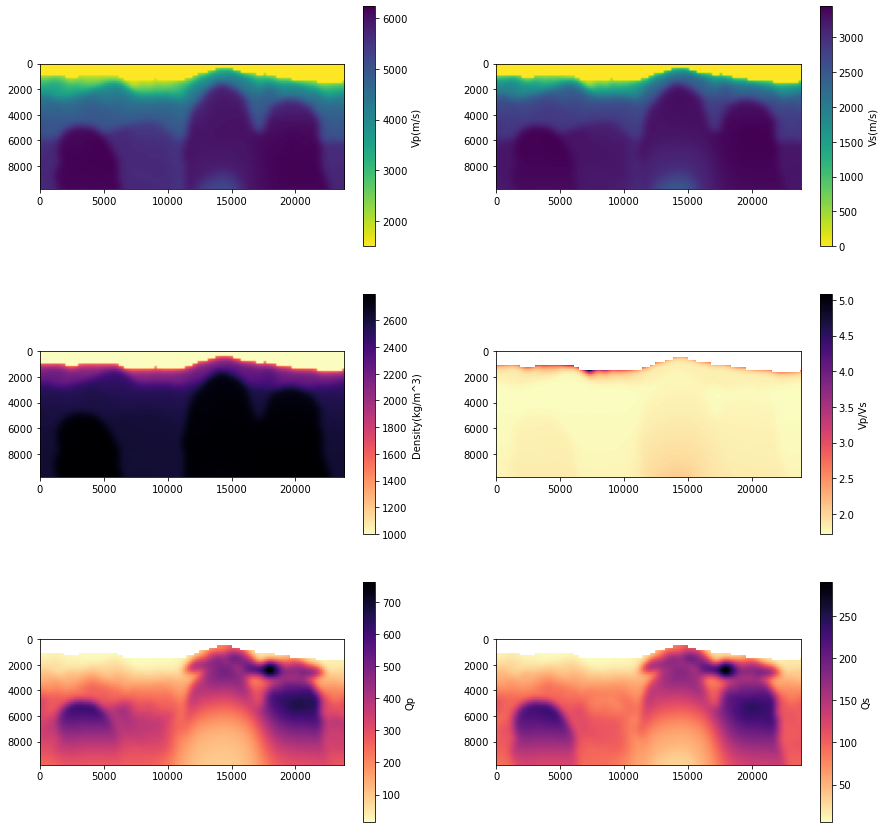

In [3]:
# Move this to a dataclean function
data_inf = np.isinf(data_list[3])
data_list[3][data_inf] = np.nan
data_inf = np.isinf(data_list[1])
data_list[1][data_inf] = np.nan

show_data(data_list,3,2)

In [4]:
new_data,data_noNan,nan_list = removenans(data)

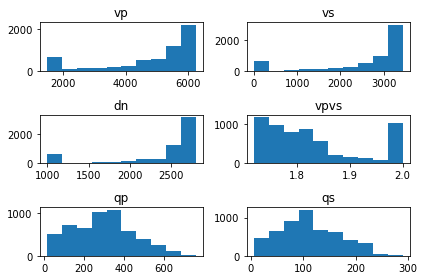

In [5]:
new_data[:,3]=np.clip(new_data[:,3],None,2)
showDistribution(new_data[:,:-2])

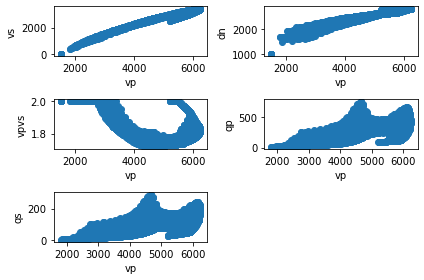

In [6]:
# Rewrite the crossplot function. This function should plot the cross-plot (scatter plot)
# of each pair of physical properties

# Here is an example. Turn it into a nice function like the showDistribution function
crossplot(new_data)

## Data Preprocessing

In [7]:
# I am unsure about what is happening with Standard Scaler
# Try replacing it with a normalization funciton that you write from scratch
#- remove the mean
#- divide by the variance
# Example:

data_preprocessing = preprocessing(data_noNan) 
#data_new = preprocessing(data_list)

(5329, 8)


## Plot Data after Preprocessing

(6000, 8)


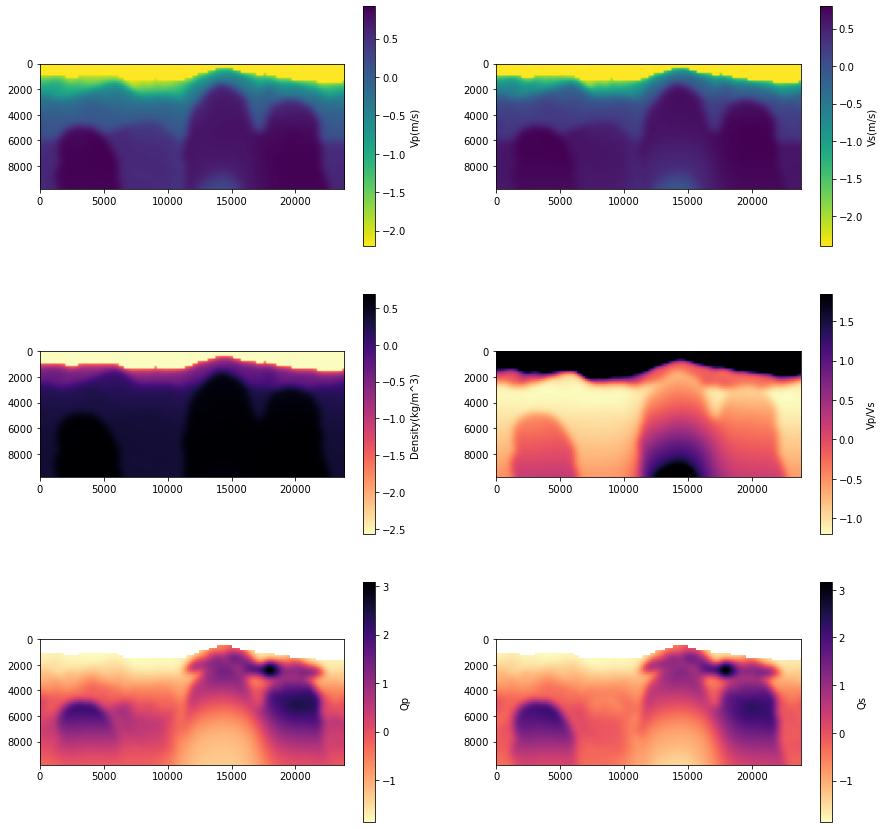

In [8]:
data_list = []
data1 = preprocessing(new_data)
for i in range(data_preprocessing.shape[1]-2):
    data_list.append(data1[:,i].reshape(50,120))
show_data(data_list,3,2)

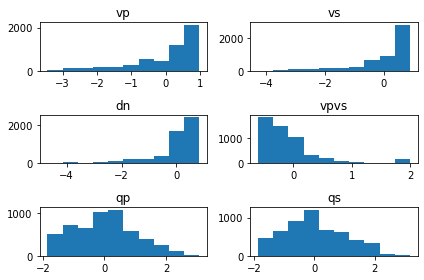

In [9]:
data_preprocessing[:,3]=np.clip(data_preprocessing[:,3],None,2)
showDistribution(data_preprocessing[:,:-2])

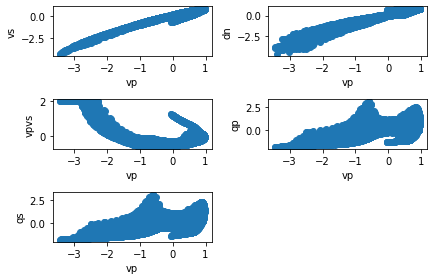

In [10]:
crossplot(data_preprocessing)

## KMeans

In [11]:
result_k = kMeans(4, data_preprocessing[:,:-2])
output_k = output_2D(result_k,nan_list)

6000
(50, 120)


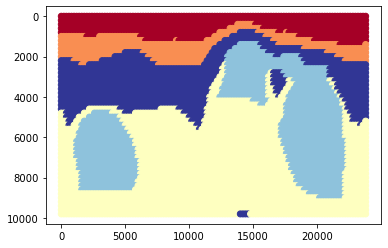

In [12]:
plotResult(data,output_k)

## Tuning Parameters

In [13]:
parameters_k = kmeans_param(data_preprocessing[:,:-2])
print(parameters_k)

{'max_iter': 400, 'n_clusters': 9, 'random_state': 0}


6000
(50, 120)


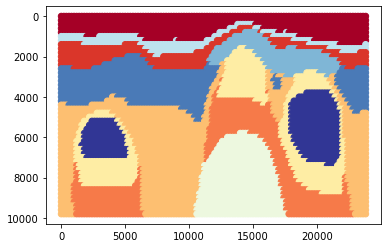

In [14]:
result_k = kMeans(9, data_preprocessing[:,:-2], 400)
output_k = output_2D(result_k,nan_list)
plotResult(data,output_k)

## Validation
### Calinsky-Harabasz score

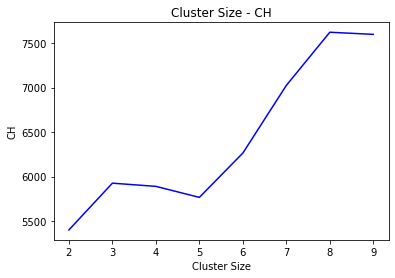

In [15]:
Kmeans_cluster_ch(data_preprocessing[:,:-2])

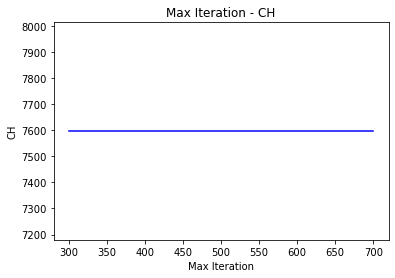

In [16]:
Kmeans_iter_ch(data_preprocessing[:,:-2])

### Silhouette score

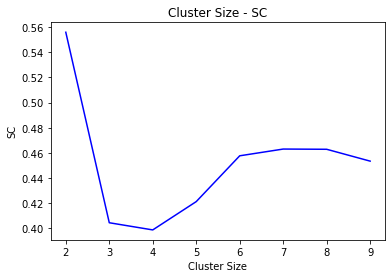

In [17]:
Kmeans_cluster_sc(data_preprocessing[:,:-2])

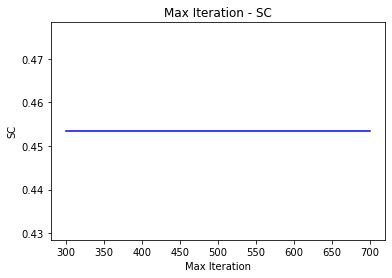

In [18]:
Kmeans_iter_sc(data_preprocessing[:,:-2])

## HDBSCAN

In [19]:
result_h, score_h = Hdbscan(4, data_preprocessing[:,:-2])
output_h = output_2D(result_h,nan_list)

6000
(50, 120)


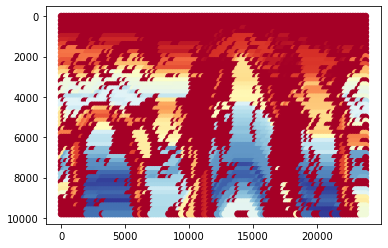

In [20]:
plotResult(data,output_h)

## Tuning Parameters

In [22]:
parameters_h = hdbscan_param(data_preprocessing[:,:-2])
print(parameters_h)

9


6000
(50, 120)


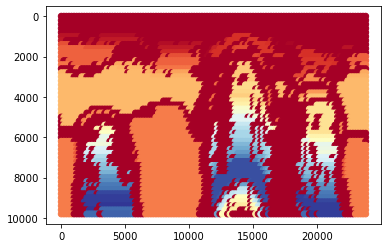

0.25573156278082687


In [23]:
result_h, score_h = Hdbscan(9, data_preprocessing[:,:-2])
output_h = output_2D(result_h,nan_list)
plotResult(data,output_h)
print(score_h)

## Validation

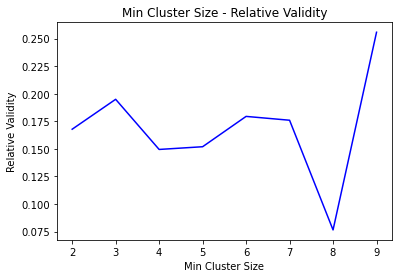

In [25]:
hdbscan_cluster(data_preprocessing[:,:-2])

## Input Data

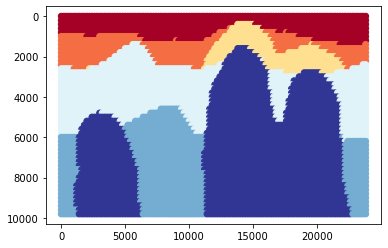

In [26]:
input_data = np.load('C:/Users/12928/Desktop/SyntheticDatasets/Model5b/input_fields.npz')
plotInputData(input_data)

## Compare KMeans, HDBSCAN with Input Data

In [27]:
output_k = output_k.reshape(-1)
output_h = output_h.reshape(-1)
input_label = input_data['classes'].reshape(-1)

### Adjusted Rand Index

#### KMeans

In [28]:
ari_k = calculateAri(output_k, input_label)
print("Adjusted Rand Index of KMeans is ", ari_k)

Adjusted Rand Index of KMeans is  0.428772472296445


#### HDBSCAN

In [29]:
ari_h = calculateAri(output_h, input_label)
print("Adjusted Rand Index of HDBSCAN is ",ari_h)

Adjusted Rand Index of HDBSCAN is  0.16444612293508046


### Adjusted Mutual Information

#### KMeans

In [30]:
ami_k = calculateAmi(output_k, input_label)
print("Adjusted Mutual Information of KMeans is ", ami_k)

Adjusted Mutual Information of KMeans is  0.6695076970210285


#### HDBSCAN

In [31]:
ami_h = calculateAmi(output_h, input_label)
print("Adjusted Mutual Information of HDBSCAN is ", ami_h)

Adjusted Mutual Information of HDBSCAN is  0.4217824490576286


### V-measure

#### KMeans

In [32]:
vm_k = calculateVm(output_k, input_label)
print("V-measure of KMeans is ", vm_k)

V-measure of KMeans is  0.6701659411810564


#### HDBSCAN

In [33]:
vm_h = calculateVm(output_h, input_label)
print("V-measure of HDBSCAN is ", vm_h)

V-measure of HDBSCAN is  0.43189028404415
